# trainTWO model7

CHANGE the code recognizing hand gesture

+distance between hand & face

[only SLTWO1]

0)above:400 / 1)below:400 / 2)resemble:800 / 3)fly:200 / 4)rise:400 / 5)together:400 / 6)as_:400 / 7)if:600 / 8)will:400 / 9)sincerely:400

[SLTWO1 & SLTWO2]

0)above:400 / 1)below:400 / 2)resemble:800 / 3)fly:400 / 4)rise:400 / 5)together:400 / 6)as_:600 / 7)if:800 / 8)will:400 / 9)sincerely:400

10)because_1:600 / 11)because_2:600 / 12)smile:400 / 13)bright:400 / 14)morning:400 / 15)group:400 / 16)jewel:600 / 17)explosion:400 / 18)always:400 / 19)flower:400



In [38]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [39]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
from itertools import chain
SLTWO1 = {0:'above', 1:'below', 2:'resemble', 3:'fly', 4:'rise',
          5:'together', 6:'as_', 7:'if', 8:'will', 9:'sincerely'}
SLTWO2 = {10:'because_1', 11:'because_2',      #because_1:오른손주먹, because_2:왼손주먹
          12: 'smile', 13:'bright', 14:'morning', 15:'group', 16:'jewel',
          17:'explosion', 18:'always', 19:'flower'}

actions = []
for v in chain(SLTWO1.values(), SLTWO2.values()):
#for v in SLTWO1.values():
    actions.append(v)
print(actions)

['above', 'below', 'resemble', 'fly', 'rise', 'together', 'as_', 'if', 'will', 'sincerely', 'because_1', 'because_2', 'smile', 'bright', 'morning', 'group', 'jewel', 'explosion', 'always', 'flower']


In [88]:
data = np.concatenate([
                       # SLTWO1
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_above_1635227447.npy'),     # above     (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_above_1635230501.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_as__1635227447.npy'),       # as_       (600)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_as__1635230501.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_as__1635230501.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_below_1635227447.npy'),     # below     (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_below_1635235319.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_fly_1635227447.npy'),       # fly       (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_fly_1635240339.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_if_1635227447.npy'),        # if        (800)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_if_1635230501.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_if_1635235319.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_if_1635240339.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_resemble_1635227447.npy'),  # resemble  (600)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_resemble_1635235319.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_resemble_1635230501.npy'),  
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_rise_1635227447.npy'),      # rise      (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_rise_1635230501.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_sincerely_1635227447.npy'), # sincerely (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_sincerely_1635230501.npy'), 
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_together_1635227447.npy'),  # together  (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_together_1635235914.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_will_1635227447.npy'),       # will      (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_will_1635230501.npy'),
                       #np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO1/two_SL_will_1635235914.npy'),

                       #SLTWO2
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_always_1635236857.npy'),    # alwyas        (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_always_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_because_1_1635236857.npy'), # because_1     (600)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_because_1_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_because_1_1635240481.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_because_2_1635236857.npy'), # because_2     (600)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_because_2_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_because_2_1635240481.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_bright_1635236857.npy'),    # bright        (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_bright_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_explosion_1635236857.npy'), # explosion     (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_explosion_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_flower_1635236857.npy'),    # flower        (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_flower_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_group_1635236857.npy'),     # group         (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_group_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_jewel_1635236857.npy'),     # jewel         (600)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_jewel_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_jewel_1635240481.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_morning_1635236857.npy'),   # morning       (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_morning_1635238877.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_smile_1635236857.npy'),      # smile         (400)
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO7/SLTWO2/two_SL_smile_1635238877.npy')



], axis=0)

data.shape

(8930, 10, 144)

In [89]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(8930, 10, 143)
(8930,)


In [90]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(8930, 20)

In [91]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(8037, 10, 143) (8037, 20)
(893, 10, 143) (893, 20)


In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                53248     
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 20)                660       
Total params: 55,988
Trainable params: 55,988
Non-trainable params: 0
_________________________________________________________________


In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
252/252 [==============================] - 5s 11ms/step - loss: 27.7438 - acc: 0.0886 - val_loss: 3.6646 - val_acc: 0.1545

Epoch 00001: val_acc improved from -inf to 0.15454, saving model to models/model.h5
Epoch 2/100
252/252 [==============================] - 3s 10ms/step - loss: 2.8878 - acc: 0.2472 - val_loss: 2.4489 - val_acc: 0.3068

Epoch 00002: val_acc improved from 0.15454 to 0.30683, saving model to models/model.h5
Epoch 3/100
252/252 [==============================] - 3s 10ms/step - loss: 2.2004 - acc: 0.3510 - val_loss: 2.0695 - val_acc: 0.3774

Epoch 00003: val_acc improved from 0.30683 to 0.37738, saving model to models/model.h5
Epoch 4/100
252/252 [==============================] - 3s 10ms/step - loss: 1.8806 - acc: 0.4325 - val_loss: 1.8614 - val_acc: 0.4737

Epoch 00004: val_acc improved from 0.37738 to 0.47368, saving model to models/model.h5
Epoch 5/100
252/252 [==============================] - 2s 10ms/step - loss: 1.5876 - acc: 0.5389 - val_loss: 1.551

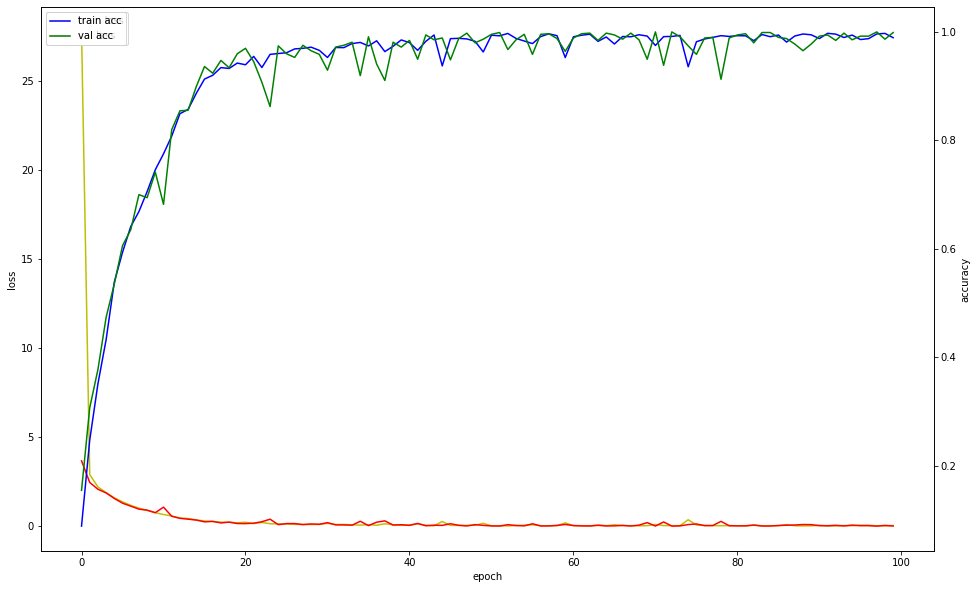

In [94]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [95]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[855,   0],
        [  0,  38]],

       [[849,   0],
        [  0,  44]],

       [[843,   0],
        [  0,  50]],

       [[854,   0],
        [  0,  39]],

       [[851,   0],
        [  0,  42]],

       [[860,   0],
        [  0,  33]],

       [[843,   0],
        [  0,  50]],

       [[810,   0],
        [  0,  83]],

       [[859,   0],
        [  0,  34]],

       [[853,   0],
        [  0,  40]],

       [[834,   0],
        [  0,  59]],

       [[851,   0],
        [  0,  42]],

       [[859,   0],
        [  0,  34]],

       [[854,   0],
        [  0,  39]],

       [[852,   0],
        [  0,  41]],

       [[846,   0],
        [  0,  47]],

       [[841,   0],
        [  0,  52]],

       [[860,   0],
        [  0,  33]],

       [[848,   0],
        [  0,  45]],

       [[845,   0],
        [  0,  48]]])

In [96]:
from keras.models import load_model

model.save('TWOmodel7_SLTWO2.h5')

from google.colab import files
files.download('TWOmodel7_SLTWO2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>